# **PROYECTO LENGUA DE SEÑAS**
---



Este proyecto representa un avance significativo al explorar las posibilidades del aprendizaje profundo, específicamente a través de una red neuronal convolucional (CNN), con el objetivo de brindar beneficios tangibles a la sociedad y mejorar la vida de un colectivo social vulnerable, como lo es la comunidad sordomuda.

El enfoque principal del proyecto radica en diseñar y desarrollar un modelo capaz de clasificar imágenes que representan las letras del alfabeto de la Lengua de Signos Americana. Esta capacidad de reconocimiento de imágenes permitiría avanzar en la comunicación y accesibilidad para las personas sordomudas, ya que podrían utilizar gestos y señas en lugar de lenguaje hablado o escrito para interactuar con otras personas.

A través de investigaciones exhaustivas y experimentos rigurosos, se ha adquirido un conocimiento esencial en el desarrollo de sistemas basados en redes neuronales convolucionales para el reconocimiento de señas. Estos esfuerzos han resultado en la creación de un componente de calidad que demuestra el potencial y las posibilidades que este tipo de redes ofrecen para aplicaciones futuras.

Este proyecto no solo busca resolver un desafío técnico, sino también hacer una contribución significativa a la sociedad al mejorar la vida y la inclusión de las personas sordomudas. Al permitir la clasificación precisa de las letras del lenguaje de señas, se abre un abanico de oportunidades para desarrollar aplicaciones y herramientas que faciliten la comunicación y promuevan la interacción entre personas sordomudas y aquellas que no conocen el lenguaje de señas.

En resumen, este proyecto representa un hito importante en la aplicación de redes neuronales convolucionales para el reconocimiento de señas en la comunidad sordomuda. Mediante la combinación de investigación, experimentación y conocimiento adquirido, se ha logrado desarrollar un modelo que abre nuevas perspectivas y posibilidades para futuras aplicaciones destinadas a mejorar la vida y la inclusión de este colectivo social.

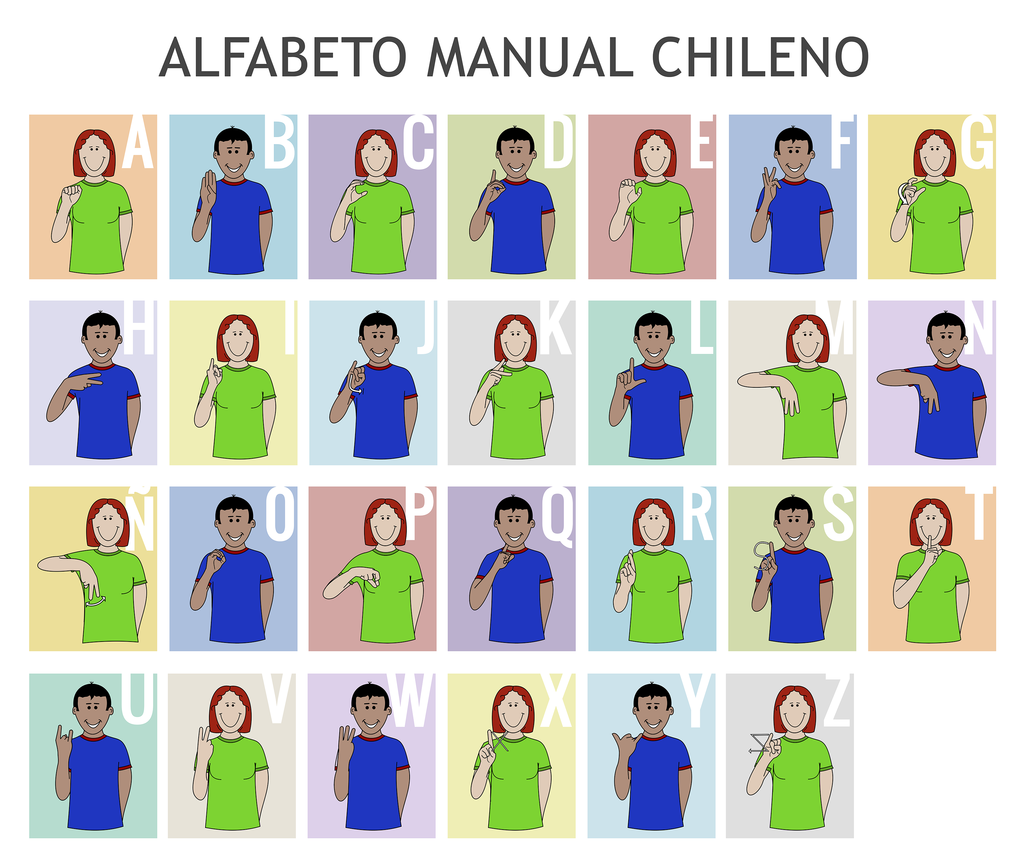

In [1]:
from PIL import Image
from google.colab import drive
# Importar la biblioteca 'google.colab' que proporciona las funciones necesarias para interactuar con Google Drive en Colab.

drive.mount('/content/drive')
# # La función 'drive.mount()' se utiliza para montar Google Drive en Colab.
# Al ejecutar esta función, se muestra un enlace en la salida del resultado.

Mounted at /content/drive


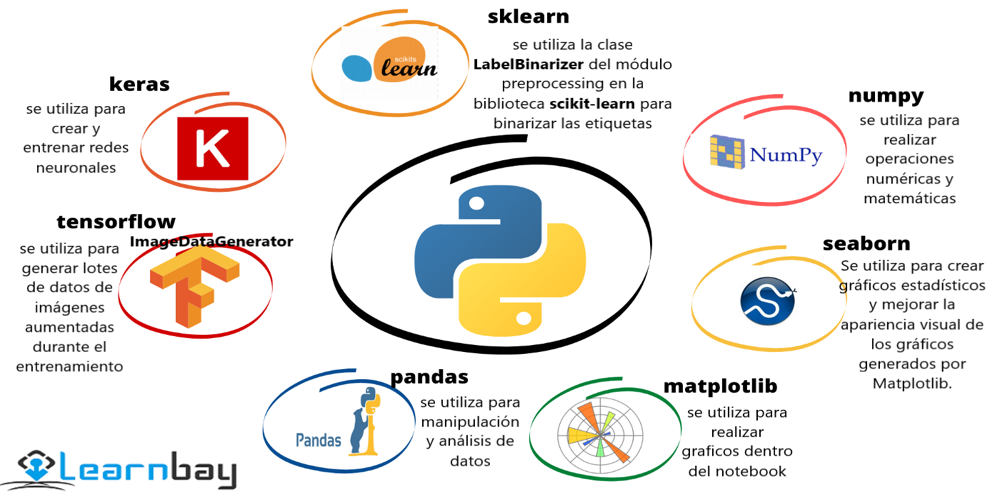

In [ ]:
image_path = '/content/drive/MyDrive/entrega 3 deep learning/librerias python.png'
desired_size = (1000, 500)
image = Image.open(image_path)
image = image.resize(desired_size)
image.show()



In [2]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
# La importación de Sequential del módulo models en Keras sirve para crear modelos secuenciales de redes neuronales.
# Un modelo secuencial es una pila lineal de capas, donde las capas se agregan una detrás de la otra.
# Sequential proporciona una interfaz sencilla para agregar capas al modelo y configurar opciones como la función de pérdida y el optimizador.
#  Es la forma más común de construir modelos de redes neuronales feed-forward en Keras.#

from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
# Las importaciones de Dense, Flatten, Conv2D, MaxPool2D y Dropout en Keras permiten utilizar estas capas en la construcción de modelos de redes neuronales.
# Estas capas tienen funciones específicas:

# Dense: Capa densa o completamente conectada en una red neuronal.
# Flatten: Capa utilizada para aplanar datos en un vector unidimensional.
# Conv2D: Capa convolucional para extraer características de imágenes o datos 2D.
# MaxPool2D: Capa para reducir la dimensionalidad de mapas de características mediante el muestreo máximo.
# Dropout: Capa para prevenir el sobreajuste y mejorar la generalización de un modelo al desactivar nodos de manera aleatoria durante el entrenamiento.



In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/entrega 3 deep learning/sign_mnist_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/entrega 3 deep learning/sign_mnist_test.csv')
# En este código, pd.read_csv() se utiliza para leer los archivos CSV ubicados en las rutas proporcionadas.
# La función devuelve un objeto DataFrame de pandas que almacena los datos del archivo CSV en una estructura tabular.

FileNotFoundError: ignored

In [ ]:
train_df.info()
# En este código, pd.read_csv() se utiliza para leer los archivos CSV ubicados en las rutas proporcionadas.
# La función devuelve un objeto DataFrame de pandas que almacena los datos del archivo CSV en una estructura tabular.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [ ]:
test_df.info()
# El método info() se utiliza para obtener información sobre la estructura y el resumen de los datos en un DataFrame. Al llamar a train_df.info(),
# se obtendrá una descripción de las columnas presentes en el DataFrame train_df, así como información sobre el tipo de datos de cada columna y el recuento de valores no nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [ ]:
train_df.describe()
# La salida proporcionada por train_df.describe() mostrará información estadística sobre las columnas numéricas, que incluirá:

# Recuento (count): el número de valores no nulos en cada columna.
# Media (mean): la media de los valores en cada columna.
# Desviación estándar (std): la medida de dispersión de los valores en cada columna.
# Valor mínimo (min): el valor mínimo en cada columna.
# Cuartiles (25%, 50%, 75%): los valores que dividen los datos en cuatro partes iguales.
# Valor máximo (max): el valor máximo en cada columna.

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
train_df.head(6)
# El método head() en un DataFrame de pandas se utiliza para mostrar las primeras filas del DataFrame.
# Al llamar a train_df.head(6), se mostrarán las primeras 6 filas del DataFrame train_df.

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255


In [ ]:
train_label=train_df['label']
# train_label = train_df['label']: Se crea una nueva variable train_label que almacena la columna 'label' del DataFrame train_df.
# Esta operación extrae la columna 'label', que suele contener las etiquetas o clases correspondientes a los datos de entrenamiento.
train_label.head()
# train_label.head(): Se utiliza el método head() para mostrar las primeras filas de la variable train_label.
# Esto te permite visualizar una muestra de las etiquetas extraídas del DataFrame train_df.
trainset=train_df.drop(['label'],axis=1)
# trainset = train_df.drop(['label'], axis=1): Se crea una nueva variable trainset que almacena el DataFrame train_df después de eliminar la columna 'label'.
# Esto se realiza utilizando el método drop(), donde se especifica el nombre de la columna y el eje (axis=1) para eliminar una columna en lugar de una fila.
trainset.head()
# trainset.head(): Se utiliza el método head() para mostrar las primeras filas del DataFrame trainset.
# Esto te permite visualizar una muestra de los datos de entrenamiento después de eliminar la columna de etiquetas.

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
X_train = trainset.values
# X_train = trainset.values: Se asigna a la variable X_train los valores del DataFrame trainset.
# Esto convierte los datos de entrenamiento en un arreglo de numpy.
X_train = trainset.values.reshape(-1,28,28,1)
# X_train = trainset.values.reshape(-1, 28, 28, 1): Se realiza una transformación en la forma del arreglo X_train para que sea compatible con el formato
# de entrada esperado por un modelo de redes neuronales convolucionales. Los datos de entrada deben tener una forma de (número_de_muestras, altura, ancho, canales).
# En este caso, se asume que las imágenes son de tamaño 28x28 píxeles con un solo canal (escala de grises). Al aplicar reshape,
# se cambia la forma del arreglo a (número_de_muestras, 28, 28, 1), donde -1 indica que el tamaño de esa dimensión se ajustará automáticamente.
print(X_train.shape)
# print(X_train.shape): Se imprime la forma de X_train para verificar la transformación realizada.
# Esto mostrará la cantidad de muestras de entrenamiento, la altura, el ancho y el número de canales de las imágenes.

(27455, 28, 28, 1)


In [ ]:
test_label=test_df['label']
# test_label = test_df['label']: Se crea una nueva variable test_label que almacena la columna 'label' del DataFrame test_df.
# Esto extrae las etiquetas correspondientes a los datos de prueba.
X_test=test_df.drop(['label'],axis=1)
# X_test = test_df.drop(['label'], axis=1): Se crea una nueva variable X_test que almacena el DataFrame test_df después de eliminar la columna 'label'.
# Esto se realiza utilizando el método drop() con axis=1 para eliminar una columna.
print(X_test.shape)
# print(X_test.shape): Se imprime la forma de X_test, que muestra la cantidad de muestras y características en los datos de prueba.
# Esto te permite verificar la estructura de los datos después de eliminar la columna de etiquetas.
X_test.head()
# X_test.head(): Se utiliza el método head() para mostrar las primeras filas del DataFrame X_test.
# Esto te permite visualizar una muestra de los datos de prueba sin la columna de etiquetas.

(7172, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
from sklearn.preprocessing import LabelBinarizer
# En el código proporcionado, se utiliza la clase LabelBinarizer del módulo preprocessing en la biblioteca scikit-learn para binarizar las etiquetas
# de clase en los conjuntos de entrenamiento y prueba. Las operaciones realizadas son las siguientes:
lb=LabelBinarizer()
#  Se crea un objeto LabelBinarizer llamado lb. LabelBinarizer se utiliza para convertir las etiquetas de clase en una representación binaria.
# Por ejemplo, si tienes etiquetas de clase en formato de texto o números enteros, LabelBinarizer las transformará en una representación de codificación binaria.
y_train=lb.fit_transform(train_label)
# Se binarizan las etiquetas de clase del conjunto de entrenamiento train_label utilizando el método fit_transform() del objeto LabelBinarizer.
# Esto ajusta el LabelBinarizer al conjunto de entrenamiento y transforma las etiquetas de clase en su representación binaria correspondiente.
# La variable y_train almacenará las etiquetas binarizadas del conjunto de entrenamiento.
y_test=lb.fit_transform(test_label)
# y_test = lb.fit_transform(test_label): Se realiza una operación similar para binarizar las etiquetas de clase del conjunto de prueba test_label.
# Las etiquetas de clase del conjunto de prueba se transforman utilizando el método fit_transform() del objeto LabelBinarizer, y las etiquetas binarizadas se almacenan en la variable y_test.

In [ ]:
y_train
# El resultado que muestra  y_train es un arreglo numpy que contiene la representación binaria de las etiquetas de clase para el conjunto de entrenamiento.
# Cada fila en el arreglo corresponde a una muestra de entrenamiento, y cada columna representa una clase.

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
X_test=X_test.values.reshape(-1,28,28,1)
# La función values se utiliza para obtener los valores de X_test como un arreglo de numpy.
# se aplica reshape para cambiar la forma del arreglo a (número_de_muestras, 28, 28, 1),
# asumiendo que las imágenes son de tamaño 28x28 píxeles con un solo canal (escala de grises).
# La dimensión -1 indica que el tamaño de esa dimensión se ajustará automáticamente en función del tamaño total y las dimensiones especificadas.

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)
# imprime la forma de los conjuntos de datos X_train, y_train, X_test y y_test.
# Esto te proporciona información sobre las dimensiones de los conjuntos de datos.
# La salida de esta instrucción sería algo similar a:

(27455, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
# Se crea un objeto ImageDataGenerator llamado train_datagen con varias opciones de aumento de datos.
# Estas opciones incluyen la reescala de los valores de píxeles para que estén en el rango de 0 a 1 mediante rescale=1./255.
                                  rotation_range = 0,
                                  # También se especifican otras transformaciones como la rotación (rotation_range)
                                  height_shift_range=0.2,
                                  # el desplazamiento vertical (height_shift_range)
                                  width_shift_range=0.2,
                                  # el desplazamiento horizontal (width_shift_range)
                                  shear_range=0,
                                  # el corte (shear_range)
                                  zoom_range=0.2,
                                  # el zoom (zoom_range)
                                  horizontal_flip=True,
                                  # el volteo horizontal (horizontal_flip)
                                  fill_mode='nearest')
                                  # el modo de relleno (fill_mode).

X_test=X_test/255
# Se normalizan los valores de píxeles en el conjunto de prueba X_test dividiéndolos por 255.
# Esta operación se realiza para asegurarse de que los valores de píxeles estén en el rango de 0 a 1, lo cual es común en la etapa de preprocesamiento de imágenes.

Text(0.5, 1.0, 'label: 13  letter: M')

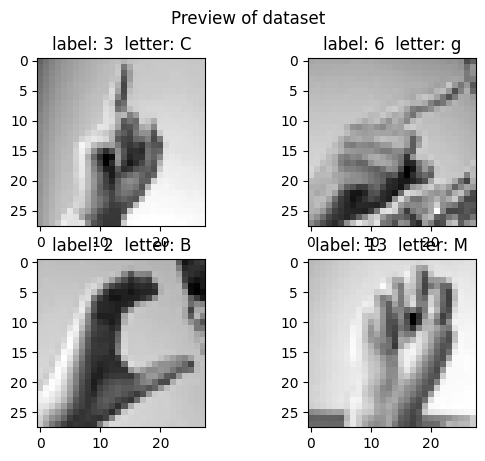

In [ ]:
fig,axe=plt.subplots(2,2)
# Se crea una figura con una disposición de 2 filas y 2 columnas que contiene un total de 4 subfiguras.
# La variable fig representa la figura y axe es una matriz que contiene las subfiguras.
fig.suptitle('Preview of dataset')
# Se establece el título principal de la figura como "Preview of dataset".
axe[0,0].imshow(X_train[0].reshape(28,28),cmap='gray')
# Se muestra la primera imagen de entrenamiento (X_train[0]) en la subfigura ubicada en la fila 0 y columna 0 (axe[0, 0])
axe[0,0].set_title('label: 3  letter: C')
# La función imshow() se utiliza para mostrar la imagen, y cmap='gray' establece la paleta de colores en escala de grises.
axe[0,1].imshow(X_train[1].reshape(28,28),cmap='gray')
# Se establece el título de la subfigura en la fila 0 y columna 0 para indicar la etiqueta de clase y la letra correspondiente.
# Se repiten los pasos 3 y 4 para mostrar las siguientes imágenes y sus respectivos títulos en las subfiguras restantes.
axe[0,1].set_title('label: 6  letter: g')
axe[1,0].imshow(X_train[2].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 2  letter: B')
axe[1,1].imshow(X_train[4].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 13  letter: M')

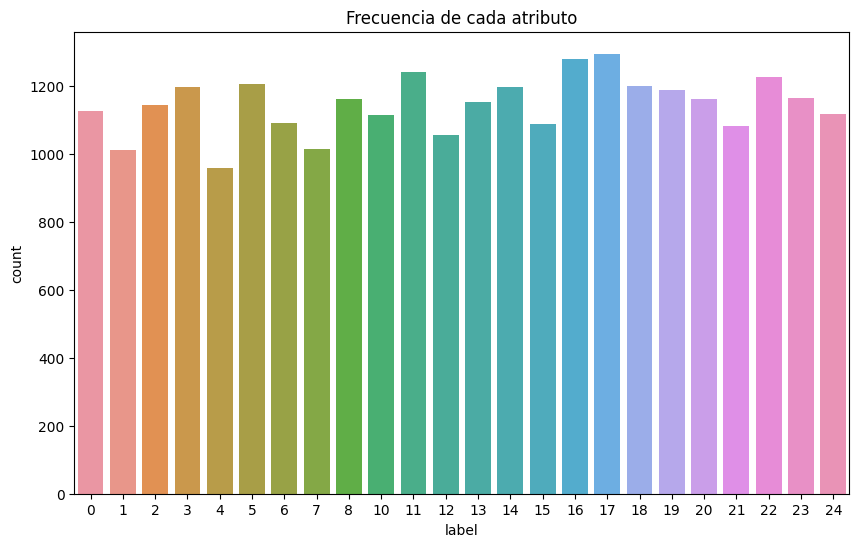

In [ ]:
label_counts = train_df['label'].value_counts()
# El primer paso es obtener el conteo de ocurrencias de cada atributo en la columna 'label' utilizando el método 'value_counts()',
# y el resultado se almacena en la variable 'label_counts
plt.figure(figsize=(10, 6))
# Luego, se crea una figura utilizando 'plt.figure(figsize=(10, 6))' con un tamaño de 10 pulgadas de ancho y 6 pulgadas de alto.
sns.countplot(data=train_df, x='label')
# Después, se utiliza la función 'sns.countplot()' de la biblioteca Seaborn para crear el gráfico de barras.
# Se especifica que los datos se toman del DataFrame 'train_df' y se utiliza la columna 'label' como variable en el eje x.
plt.title("Frecuencia de cada atributo")
# Se establece un título para el gráfico utilizando 'plt.title("Frecuencia de cada atributo")'.
plt.show()
# Finalmente, se utiliza 'plt.show()' para mostrar el gráfico en pantalla.

# **Modelo de Redes Neuronales Convolucionales CNN" (Convolutional Neural Networks)**

In [ ]:
model=Sequential()

#primera capa
model.add(Conv2D(128,kernel_size=(5,5),



                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))

#segunda capa
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))


#tercera capa
model.add(Conv2D(64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
#cuarta capa
model.add(MaxPool2D((2,2),2,padding='same'))

#quinta capa
model.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
#sexta capa
model.add(MaxPool2D((2,2),2,padding='same'))
# septima capa
model.add(Flatten())




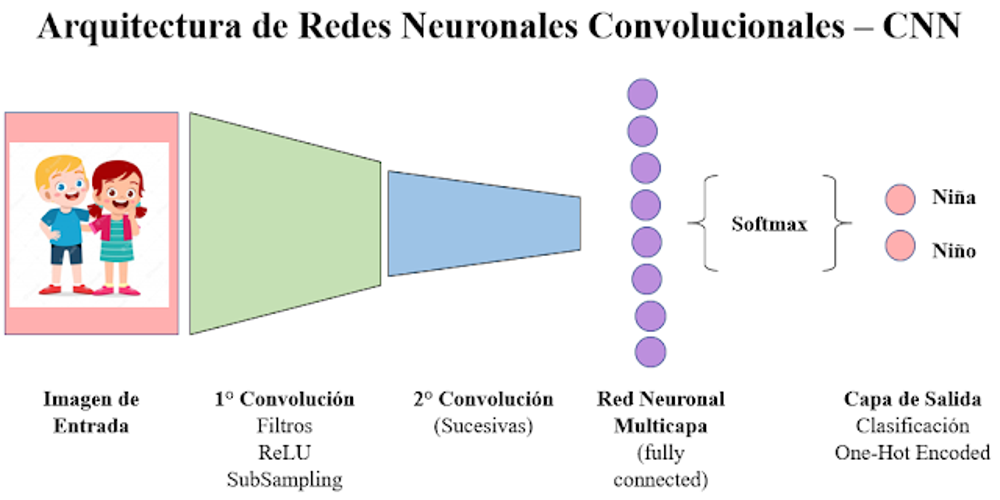

In [ ]:
image_path = '/content/drive/MyDrive/entrega 3 deep learning/convolucional.png'
desired_size = (1000, 500)
image = Image.open(image_path)
image = image.resize(desired_size)
image.show()

In [ ]:
#octava capa
model.add(Dense(units=512,activation='relu'))
#novena capa
model.add(Dropout(rate=0.25))
#decima capa
model.add(Dense(units=24,activation='softmax'))

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 32)          8224      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 32)        

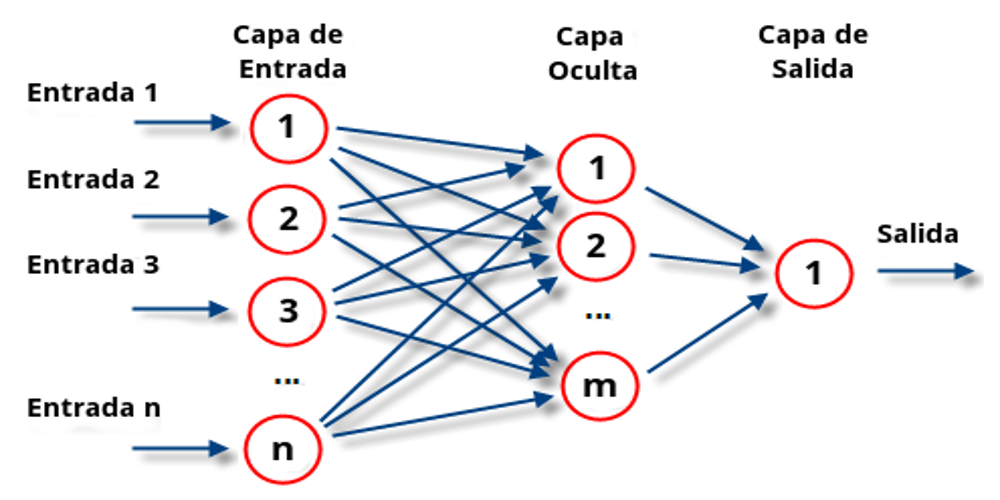

In [ ]:
image_path = '/content/drive/MyDrive/entrega 3 deep learning/Redes_neuronales_esquema.png'
desired_size = (1000, 500)
image = Image.open(image_path)
image = image.resize(desired_size)
image.show()

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# optimizer='adam': El parámetro optimizer se refiere al algoritmo utilizado para optimizar los pesos y las actualizaciones en el entrenamiento del modelo.
# En este caso, se utiliza el optimizador Adam, que es un método popular y eficiente para el entrenamiento de redes neuronales.

# loss='categorical_crossentropy': El parámetro loss se refiere a la función de pérdida utilizada para calcular la discrepancia entre las predicciones
# del modelo y las etiquetas verdaderas durante el entrenamiento. En este caso, se utiliza la función de pérdida de entropía cruzada categórica,
# que es comúnmente utilizada en problemas de clasificación multiclase cuando las etiquetas se encuentran en formato de codificación one-hot (binarizadas).

# metrics=['accuracy']: El parámetro metrics se refiere a las métricas utilizadas para evaluar y monitorear el rendimiento del modelo durante el entrenamiento.
# En este caso, se utiliza la métrica de precisión (accuracy), que calcula la proporción de muestras clasificadas correctamente.

Epoch 1/35
138/138 [==============================] - 21s 120ms/step - loss: 3.0289 - accuracy: 0.0924 - val_loss: 2.4854 - val_accuracy: 0.2291
Epoch 2/35
138/138 [==============================] - 10s 76ms/step - loss: 2.3016 - accuracy: 0.2773 - val_loss: 1.7476 - val_accuracy: 0.4077
Epoch 3/35
138/138 [==============================] - 11s 76ms/step - loss: 1.7433 - accuracy: 0.4353 - val_loss: 1.0552 - val_accuracy: 0.6425
Epoch 4/35
138/138 [==============================] - 10s 71ms/step - loss: 1.3715 - accuracy: 0.5432 - val_loss: 0.9775 - val_accuracy: 0.6433
Epoch 5/35
138/138 [==============================] - 12s 87ms/step - loss: 1.1364 - accuracy: 0.6174 - val_loss: 0.7755 - val_accuracy: 0.7002
Epoch 6/35
138/138 [==============================] - 10s 74ms/step - loss: 0.9482 - accuracy: 0.6782 - val_loss: 0.6066 - val_accuracy: 0.7744
Epoch 7/35
138/138 [==============================] - 10s 69ms/step - loss: 0.8477 - accuracy: 0.7135 - val_loss: 0.5941 - val_accuracy

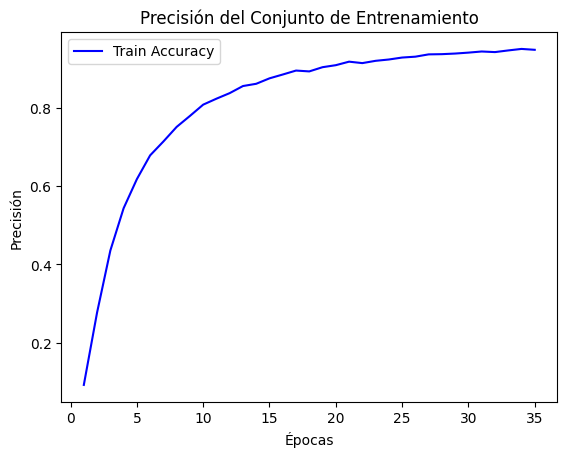

In [ ]:
history = model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
# En este parámetro, se utiliza el generador de datos train_datagen creado previamente para generar lotes de datos de entrenamiento y
# etiquetas a medida que se entrena el modelo. X_train y y_train son los conjuntos de datos de entrenamiento,
# y batch_size=200 indica el tamaño de lote utilizado durante el entrenamiento.
         epochs = 35,
          # Este parámetro especifica el número de veces que el modelo se entrenará en todo el conjunto de datos de entrenamiento.
          # En este caso, el modelo se entrenará durante 135 épocas, lo que significa que pasará por todo el conjunto de datos de entrenamiento 135 veces.
          validation_data=(X_test,y_test),
          # Aquí se especifica el conjunto de datos de validación que se utilizará durante el entrenamiento para evaluar el rendimiento del modelo en datos no vistos previamente.
          # X_test y y_test son los conjuntos de datos de prueba.
          shuffle=1
          # Este parámetro indica si los datos de entrenamiento y validación se deben barajar (mezclar) antes de cada época.
          # En este caso, se utiliza shuffle=1, lo que significa que los datos se barajarán en cada época para evitar cualquier sesgo o patrón en el orden de los datos durante el entrenamiento.
         )
# Obtener las métricas del entrenamiento
train_acc = history.history['accuracy']
epochs = range(1, len(train_acc) + 1)

# Crear el gráfico
plt.plot(epochs, train_acc, 'b', label='Train Accuracy')
plt.title('Precisión del Conjunto de Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

In [ ]:
print('MODEL ACCURACY = {}%'.format(acc*100))
# indica que la precisión del modelo en los datos de prueba es del 98.04%.
# Esto significa que el modelo ha logrado predecir correctamente el 98.04% de las muestras en los datos de prueba.

# Una precisión tan alta indica que el modelo es altamente preciso en su capacidad para clasificar las muestras en las diferentes clases del problema.

MODEL ACCURACY = 99.58170652389526%


In [ ]:
model.save("modelo_entrenadoNuevo.h5")
# Se utiliza el método save() en el modelo para guardar todos los pesos y la arquitectura del modelo en un archivo con nombre "modelo_entrenadoNuevo.h5".
# La extensión .h5 se utiliza comúnmente para archivos que almacenan modelos de Keras.

In [ ]:
nombres = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
# Cada elemento de la lista nombres corresponde a una letra del alfabeto de lenguaje de señas.
# Esta lista se puede utilizar como referencia para asociar cada imagen de entrenamiento con su respectiva letra del lenguaje de señas.

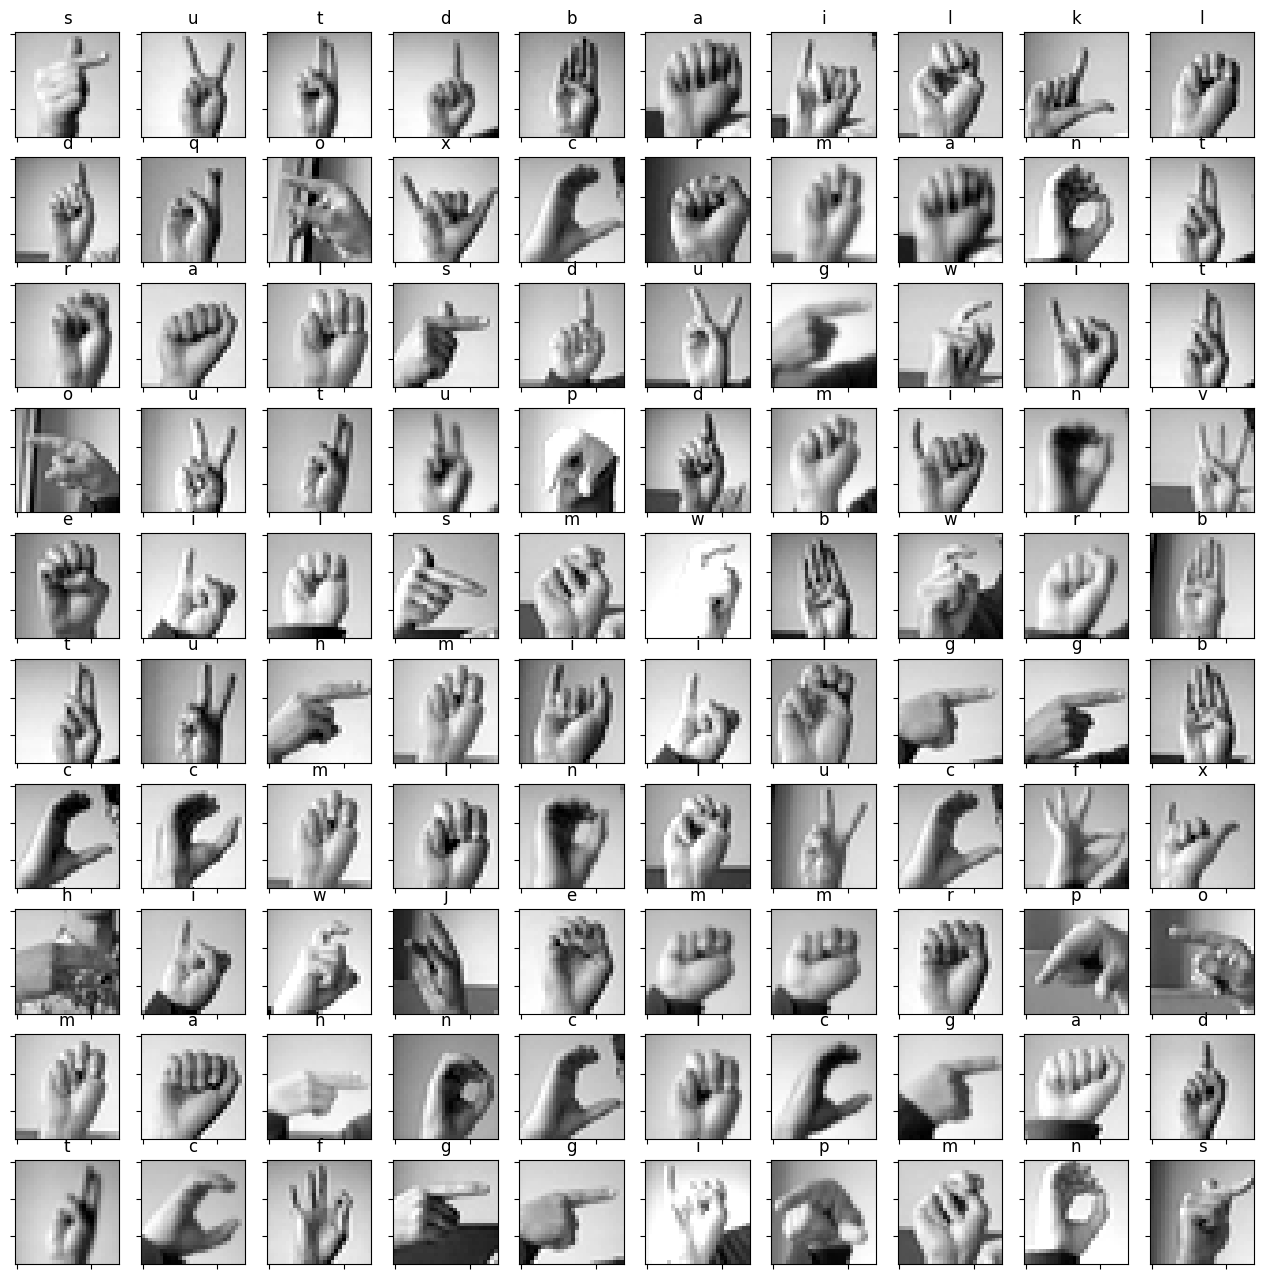

In [ ]:
h = 10
w = 10

# h = 10 y w = 10: Estos valores representan la cantidad de filas (h) y columnas (w) de subgráficos que se mostrarán en la cuadrícula.

fig, axs = plt.subplots(h, w, figsize=(1.6 * h, 1.6 * w))

# fig, axs = plt.subplots(h, w, figsize=(1.6 * h, 1.6 * w)): Se crea una figura de subgráficos utilizando la función subplots() de matplotlib.
# La figura contendrá h filas y w columnas de subgráficos, y se establece el tamaño de la figura en función de los valores de h y w.


# El siguiente bloque de código utiliza dos bucles for para recorrer cada subgráfico en la cuadrícula.
for i in range(h):
    for j in range(w):
        ex = np.random.randint(len(X_test))
        # ex = np.random.randint(len(X_test)): Se selecciona de manera aleatoria un índice ex dentro del rango de la longitud de los datos de prueba (X_test).
        axs[i, j].set_title(nombres[np.argmax(y_test[ex])])
        # axs[i, j].set_title(nombres[np.argmax(y_test[ex])]): Se establece el título del subgráfico actual con la etiqueta correspondiente al índice ex en la lista nombres.
        # La etiqueta se obtiene utilizando np.argmax() para encontrar el índice del valor máximo en y_test[ex], que representa la letra clasificada en one-hot encoding.
        axs[i, j].grid(False)
        # axs[i, j].grid(False): Se desactiva la visualización de las líneas de la cuadrícula en el subgráfico.
        axs[i, j].set_xticklabels([])
        axs[i, j].set_yticklabels([])
        # # axs[i, j].set_xticklabels([]) y axs[i, j].set_yticklabels([]): Se eliminan las etiquetas del eje x y del eje y en el subgráfico para tener una imagen más limpia.
        axs[i, j].imshow(X_test[ex].reshape(28, 28), cmap='gray')
        # axs[i, j].imshow(X_test[ex].reshape(28, 28), cmap='gray'): Se muestra la imagen correspondiente al índice ex en el subgráfico actual.
        # La imagen se visualiza utilizando imshow() de matplotlib y se le aplica un mapa de colores en escala de grises (cmap='gray').

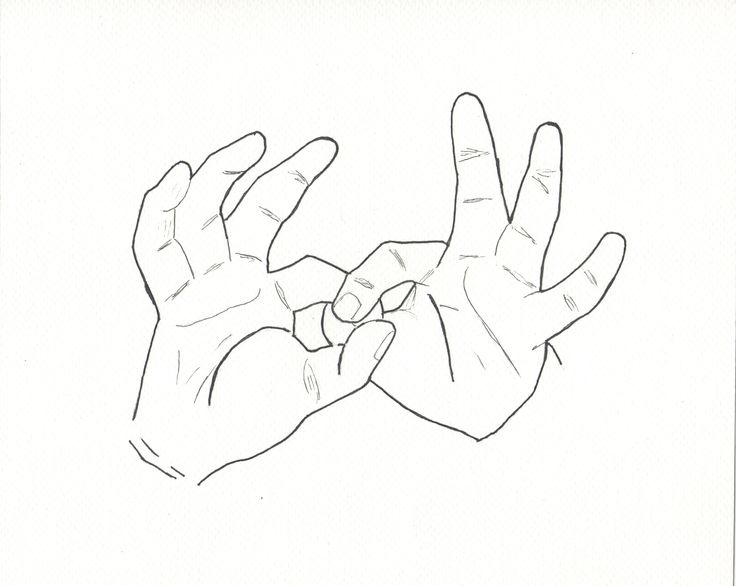